In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [74]:
data = pd.read_csv("../../../../../../CS 846 project data/new_pullreq.csv") 

In [75]:
pd.set_option('display.max_columns', None)
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,14668.0,15,0.089869,79,745.04600,0.00000,0.000000,2070,14,1.000000,118,0,0,0,1,0.000000,0.000000,1.000000,1,0,0,0,0,1,0,0,4926,NaN,1.0,274.0,1.0,1.0,0.0,success,success,JavaScript,140,21,52,0.978469,25,237.0,196583.0,28,0,353,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,14,NaN,NaN,0.805841,0.629980,0.468658,0.658221,0.541352,0.0,0.0,1.0,neutral,0,28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,1,1,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,0,0,1,1,0,0,0,0,2,2,1,474.0,2,0.014019,38,147.48200,16.18700,21.582700,1,299,1.000000,38,0,0,0,2,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1312,NaN,1.0,79.0,1.0,0.0,1.0,failure,failure,Python,1,6,1,1.000000,7,NaN,9.0,432,0,1092,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0,300,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,34921.0,5,0.256849,175,4.64599,0.00000,0.114012,5,81,0.987654,33,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,4,NaN,1.0,88.0,1.0,1.0,0.0,success,success,JavaScript,11,6,0,0.996324,10,NaN,5743.0,652,0,1884,1,male,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.000000,0.000000,NaN,94,malaysia,NaN,0.796278,0.656912,0.485889,0.655315,0.609593,0.0,0.0,0.0,NaN,0,505,0.428571,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,0,0,2,2,2,0,0,0,0,0,0,143159.0,5,0.014706,24,120.71000,0.00000,10.109800,2194,293,0.989761,222,110,3,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,1,94,NaN,1.0,489.0,1.0,1.0,0.0,success,success,Go,269,37,212,0.986523,29,NaN,978.0,1050,0,3489,1,male,canada,NaN,0.814346,0.633765,0.471257,0.666831,0.485847,0.0,0.000000,0.000000,NaN,679,NaN,NaN,0.818143,0.630804,0.466899,0.650931,0.496465,0.0,0.0,0.0,NaN,1,460,0.138889,NaN,NaN,0.003796,0.002961,0.004358,0.015900,0.010618,0,0,0,0,0,0,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,0,0,2,2,2,0,0,0,1,1,1,6247.0,2,0.173077,7,554.16800,28.61830,84.142200,131,3,1.000000,1,60,0,0,

In [76]:
#Checking for NaN values in same_country column
null_samecountry=data['same_country'].isna().sum()
nonnull_samecountry=data.shape[0]-null_samecountry
print("Same_country")
print("Null rows: {}".format(null_samecountry))
print("Non Null rows: {}".format(nonnull_samecountry))

Same_country
Null rows: 2238549
Non Null rows: 1109388


In [77]:
#Checking for NaN values in same_affiliation column
null_sameaffil=data['same_affiliation'].isna().sum()
nonnull_sameaffil=data.shape[0]-null_sameaffil
print("Same_affiliation")
print("Null rows: {}".format(null_sameaffil))
print("Non Null rows: {}".format(nonnull_sameaffil))

Same_affiliation
Null rows: 2707224
Non Null rows: 640713


In [78]:
#Double checking 'same country' using subset which has records where integ country= submitter country
datacheck=data[data['same_country']==data['same_affiliation']]
datacheck

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,files_added,files_deleted,files_modified,files_changed,src_files,doc_files,other_files,num_commit_comments,num_issue_comments,num_comments,num_participants,sloc,team_size,perc_external_contribs,commits_on_files_touched,test_lines_per_kloc,test_cases_per_kloc,asserts_per_kloc,watchers,prev_pullreqs,requester_succ_rate,followers,churn_addition,churn_deletion,pr_comment_num,comment_num,perc_neg_emotion,perc_pos_emotion,perc_neu_emotion,part_num_issue,part_num_commit,part_num_pr,part_num_code,comment_conflict,hash_tag,at_tag,test_inclusion,description_length,bug_fix,ci_exists,ci_latency,ci_build_num,ci_test_passed,ci_failed_perc,ci_first_build_status,ci_last_build_status,language,fork_num,project_age,open_issue_num,pr_succ_rate,open_pr_num,first_response_time,pushed_delta,acc_commit_num,first_pr,account_creation_days,core_member,contrib_gender,contrib_country,contrib_affiliation,contrib_open,contrib_cons,contrib_extra,contrib_agree,contrib_neur,perc_contrib_neg_emo,perc_contrib_pos_emo,perc_contrib_neu_emo,contrib_first_emo,prior_review_num,inte_country,inte_affiliation,inte_open,inte_cons,inte_extra,inte_agree,inte_neur,perc_inte_neg_emo,perc_inte_pos_emo,perc_inte_neu_emo,inte_first_emo,contrib_follow_integrator,prior_interaction,social_strength,same_country,same_affiliation,open_diff,cons_diff,extra_diff,agree_diff,neur_diff,has_comments,has_participants,has_exchange,contrib_comment,inte_comment,reviewer_comment,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
21,22,22182978,cynicaloptimist,improved-initiative,1,0,0.0,1,0,0,0,0,2,2,0,1,1,0,0,0,0,52.0,2,0.004950,39,350.00000,25.000000,37.500000,45,41,1.000000,7,0,0,0,0,0.00,0.000,0.000,0,0,0,0,0,0,0,0,5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,25,28,30,1.000000,0,NaN,48504.0,1007,0,1790,1,male,united states,tableau,0.816425,0.662518,0.506869,0.693114,0.449235,0.0,0.0,0.0,NaN,54,united states,tableau,0.816425,0.662518,0.506869,0.693114,0.449235,0.0,0.0,0.0,NaN,0,229,0.333333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1313.0,0,0.974831,0,0,0
28,29,13427273,project-ncl,pnc,1,183,183.0,1,64,0,0,0,1,1,1,0,0,0,1,1,1,33505.0,6,0.000000,2,1.25197,0.029809,0.029809,18,248,0.975806,1,51,13,0,1,0.00,0.000,1.000,1,0,0,0,0,0,0,0,12,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,36,40,1,0.987307,28,NaN,73.0,885,0,1834,1,male,united kingdom,red hat,0.774001,0.666403,0.483325,0.703164,0.603478,0.0,0.0,1.0,neutral,293,united kingdom,red hat,0.774001,0.666403,0.483325,0.703164,0.603478,0.0,0.0,0.0,NaN,0,47,0.173913,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,0,0,2855.0,0,0.163074,0,183,0
47,48,33685085,prestodb,presto,1,5155,5155.0,4,108,181,0,0,11,11,10,0,1,0,4,8,2,362875.0,40,0.024432,16,348.73200,10.066700,52.875000,3378,26,0.961538,2,189,100,4,8,0.00,0.125,0.875,2,0,1,1,0,1,0,1,15,NaN,1.0,2463.0,7.0,0.0,0.428571,failure,success,Java,1288,70,1100,0.977778,329,1143.0,10798.0,158,0,2279,1,male,united states,facebook,0.807796,0.693049,0.499464,0.675252,0.415675,0.0,0.5,0.5,neutral,8,united states,facebook,0.807796,0.693049,0.499464,0.675252,0.415675,0.0,0.0,0.0,NaN,0,128,0.108844,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,2,4,0,9.0,0,0.008567,0,5155,0
57,58,20796,hazelcast,hazelcast,1,1523,1523.0,2,139,199,1,0,4,5,5,0,0,0,0,3,3,263257.0,22,0.021782,13,594.97400,24.590200,77.719900,2265,589,0.957555,4,302,36,3,3,0.00,0.000,1.000,0,0,3,3,0,0,1,1,13,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Java,823,64,941,0.971878,240,228.0,9158.0,1861,0,1694,1,male,turkey,hazelcast,0.809644,0.662213,0.458517,0.656612,0.483067,0.0,0.0,1.0,neutral,365,turkey,hazelcast,0.809644,0.662213,0.458517,0.656612,0.483067,0.0,0.0,0.0,NaN,0,188,0.218750,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,0,1,3,1,1.0,0,0.069036,0,1523,0
75,76,8196280,apache,spark,0,54180,NaN,4,26,138,0,0,5,5,4,0,1,0,16,17,5,104

In [79]:
#keeping only the necessary columns and subsetting rows which have non null same country
data_subset = data[['project_id', 'ownername', 'reponame','merged_or_not', 'contrib_gender', 'contrib_country', 'inte_country', 'same_country']].dropna(subset=['same_country'])
data_subset

,project_id,ownername,reponame,merged_or_not,contrib_gender,contrib_country,inte_country,same_country
2,93139005,binary-com,SmartCharts,1,male,malaysia,malaysia,1.0
11,73033219,Zeit,docs,1,male,peru,united kingdom,0.0
16,46403735,portainer,portainer,1,male,united states,united states,1.0
21,22182978,cynicaloptimist,improved-initiative,1,male,united states,united states,1.0
22,46634954,GoogleCloudPlatform,google-cloud-eclipse,1,female,united states,united states,1.0
...,...,...,...,...,...,...,...,...
3347926,22070816,FormidableLabs,victory,1,female,united states,united states,1.0
3347927,55688056,zsmartsystems,com.zsmartsystems.zigbee,1,male,united kingdom,united kingdom,1.0
3347930,28904919,plotly,plotly.js,1,male,united states,united states,1.0
3347933,1142,saltstack,salt,0,male,united states,united states,1.0


In [80]:
#ADDING IN THE REGIONS (similar to other question codes)

sub_saharan_africa = ["angola","benin","botswana","burkina faso","burundi","cabo verde","cameroon","central african republic","chad" "comoros ","congo","cote d'ivoire","democratic republic of the congo","djibouti","equatorial guinea","eritrea","ethiopia","gabon","gambia","ghana","guinea","guinea-bissau ","kenya","lesotho","liberia","madagascar","malawi","mali","mauritania","mauritius","mayotte","mozambique" "namibia","niger","nigeria","reunion","rwanda","sao tome and principe","senegal","seychelles","sierra leone","somalia","south africa","south sudan","swaziland","togo","uganda","tanzania","zambia","zimbabwe"]
northern_africa = ["algeria", "egypt", "libya", "morocco", "sudan", "tunisia", "western sahara"]
western_asia =  ["azerbaijan", "armenia", "bahrain", "cyprus", "georgia", "iraq", "israel", "jordan", "kuwait", "lebanon", "palestinian territories", "oman", "qatar", "saudi arabia", "syria", "turkey", "united arab emirates", "yemen"]
central_asia =["kazakhstan", "kyrgyzstan", "tajikistan", "turkmenistan", "uzbekistan"]
southern_asia = ["afghanistan", "bangladesh", "bhutan", "india", "iran", "maldives", "nepal", "pakistan", "sri lanka"]
eastern_asia = ["vietnam","taiwan","macau","laos","china", "hong kong", "china, macao sar", "south korea", "japan", "mongolia", "north korea"]
south_eastern_asia = ["brunei", "cambodia", "indonesia", "lao people's democratic republic", "malaysia", "myanmar", "philippines", "singapore", "thailand", "timor-leste", "viet nam"]
caribbean = ["anguilla", "antigua and barbuda", "aruba", "bahamas", "barbados", "bonaire, sint eustatius and saba", "virgin islands", "cayman islands", "cuba", "curacao", "dominica", "dominican republic", "grenada", "guadeloupe", "haiti", "jamaica", "martinique", "montserrat", "puerto rico", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "sint maarten (dutch part)", "trinidad and tobago", "turks and caicos islands", "united states virgin islands"]
central_america = ["belize", "honduras", "costa rica", "el salvador", "guatemala", "mexico", "nicaragua", "panama"]
south_america = ["argentina", "bolivia", "brazil", "chile", "colombia", "ecuador", "french guiana", "falkland islands (malvinas)", "south georgia & the south sandwich islands", "guyana", "paraguay", "peru", "suriname", "uruguay", "venezuela"]
australia_and_new_zealand = ["australia", "christmas island", "cocos (keeling) islands", "heard island & mcdonald islands", "norfolk island", "new zealand"]
melanesia = ["fiji", "new caledonia", "papua new guinea", "solomon islands", "vanuatu"]
micronesia = ["kiribati", "marshall islands", "micronesia (federated states of)", "nauru", "northern mariana islands", "palau", "guam"]
polynesia = ["french polynesia", "wallis and futuna island", "pitcairn", "cook islands", "niue", "tokelau", "tonga", "tuvalu", "american samoa", "samoa"]
northern_america = ["bermuda", "canada", "greenland", "united states"]
eastern_europe = ["bulgaria", "belarus", "czech republic", "hungary", "moldova", "poland", "romania", "russia", "slovakia", "ukraine"]
western_europe = ["austria", "belgium", "switzerland", "germany", "france", "liechtenstein", "luxembourg", "monaco", "netherlands antilles","netherlands", "jersey", "guernsey"]
northern_europe = ["åland islands", "channel islands", "denmark", "estonia", "faroe islands", "finland", "isle of man", "united kingdom", "iceland", "ireland", "latvia", "lithuania", "norway", "sweden"]
southern_europe = ["albania", "andorra", "bosnia and herzegovina", "croatia", "greece", "italy", "malta", "montenegro", "portugal", "san marino", "serbia", "slovenia", "spain", "macedonia", "kosovo"]

In [81]:
#replacing countries with regions
data_subset.loc[data_subset["contrib_country"].isin(sub_saharan_africa), "contrib_country"] = "sub_saharan_africa"
data_subset.loc[data_subset["contrib_country"].isin(northern_africa), "contrib_country"] = "northern_africa"
data_subset.loc[data_subset["contrib_country"].isin(western_asia), "contrib_country"] = "western_asia"
data_subset.loc[data_subset["contrib_country"].isin(central_asia), "contrib_country"] = "central_asia"
data_subset.loc[data_subset["contrib_country"].isin(southern_asia), "contrib_country"] = "southern_asia"
data_subset.loc[data_subset["contrib_country"].isin(eastern_asia), "contrib_country"] = "eastern_asia"
data_subset.loc[data_subset["contrib_country"].isin(south_eastern_asia), "contrib_country"] = "south_eastern_asia"
data_subset.loc[data_subset["contrib_country"].isin(caribbean), "contrib_country"] = "caribbean"
data_subset.loc[data_subset["contrib_country"].isin(central_america), "contrib_country"] = "central_america"
data_subset.loc[data_subset["contrib_country"].isin(south_america), "contrib_country"] = "south_america"
data_subset.loc[data_subset["contrib_country"].isin(australia_and_new_zealand), "contrib_country"] = "australia_and_new_zealand"
data_subset.loc[data_subset["contrib_country"].isin(melanesia), "contrib_country"] = "melanesia"
data_subset.loc[data_subset["contrib_country"].isin(micronesia), "contrib_country"] = "micronesia"
data_subset.loc[data_subset["contrib_country"].isin(polynesia), "contrib_country"] = "polynesia"
data_subset.loc[data_subset["contrib_country"].isin(northern_america), "contrib_country"] = "northern_america"
data_subset.loc[data_subset["contrib_country"].isin(eastern_europe), "contrib_country"] = "eastern_europe"
data_subset.loc[data_subset["contrib_country"].isin(western_europe), "contrib_country"] = "western_europe"
data_subset.loc[data_subset["contrib_country"].isin(northern_europe), "contrib_country"] = "northern_europe"
data_subset.loc[data_subset["contrib_country"].isin(southern_europe), "contrib_country"] = "southern_europe"
data_subset.loc[data_subset["contrib_country"].isin(["mozambique"]), "contrib_country"] = "sub_saharan_africa"

In [82]:
import seaborn as sns

In [83]:
groupedvalues = data_subset.groupby(['contrib_country','same_country']).agg(merged_fraction=("merged_or_not",'mean'))
 

In [84]:
groupedvalues=groupedvalues.reset_index()

In [85]:
groupedvalues

,contrib_country,same_country,merged_fraction
0,antarctica,0.0,0.652174
1,antarctica,1.0,0.583333
2,australia_and_new_zealand,0.0,0.836556
3,australia_and_new_zealand,1.0,0.816734
4,caribbean,0.0,0.710660
5,caribbean,1.0,0.688963
6,central_america,0.0,0.876696
7,central_america,1.0,0.767904
8,central_asia,0.0,0.918826
9,central_asia,1.0,0.632075


In [86]:
# finding countries where fraction of requests merged among those put by 
region_count = groupedvalues.groupby(['contrib_country','same_country']).mean().squeeze().unstack().add_suffix('_mergecount')
print (region_count)

same_country               0.0_mergecount  1.0_mergecount
contrib_country                                          
antarctica                       0.652174        0.583333
australia_and_new_zealand        0.836556        0.816734
caribbean                        0.710660        0.688963
central_america                  0.876696        0.767904
central_asia                     0.918826        0.632075
cocos islands                    1.000000             NaN
eastern_asia                     0.778910        0.781475
eastern_europe                   0.834479        0.791150
gibraltar                        0.777778        0.000000
melanesia                        0.500000        0.125000
micronesia                       1.000000        0.980000
northern_africa                  0.667219        0.491566
northern_america                 0.826213        0.838036
northern_europe                  0.840508        0.854573
pitcairn islands                 0.333333             NaN
polynesia     

In [87]:
#regions where same country has effect
similar_regions= region_count[region_count["0.0_mergecount"] < region_count["1.0_mergecount"]]
print(similar_regions)

same_country        0.0_mergecount  1.0_mergecount
contrib_country                                   
eastern_asia              0.778910        0.781475
northern_america          0.826213        0.838036
northern_europe           0.840508        0.854573
south_america             0.798192        0.819045
south_eastern_asia        0.808166        0.810819
southern_europe           0.794918        0.830826
sub_saharan_africa        0.786702        0.810534
western_asia              0.789407        0.853441
western_europe            0.787646        0.828747


<Figure size 720x720 with 0 Axes>

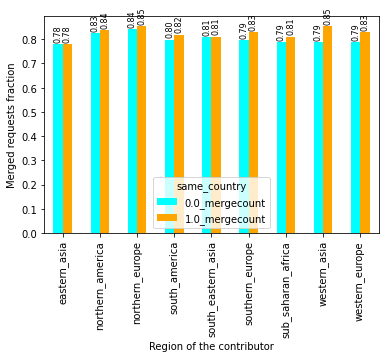

In [88]:
#plotting the regions where pull request acceptance is more when contrib and integ are from same countries
plt.figure(figsize=(10, 10))
g=similar_regions.plot(kind='bar', color=['cyan', 'orange'])
plt.ylabel("Merged requests fraction", size=10)
plt.xlabel("Region of the contributor", size=10)
plt.xticks(rotation=90)
for p in g.patches:
    g.annotate(format(p.get_height(),'0.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom', 
                   size=8,
                   xytext = (0, 2), 
                   textcoords = 'offset points', rotation=90)